# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [3]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [7]:
print(app_train.shape)
app_train.info()
app_train.head(10) #大致知道資料的長相

(307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


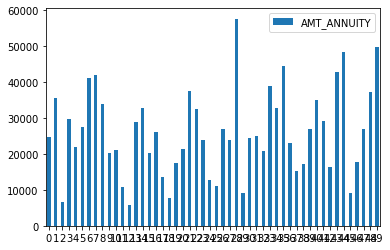

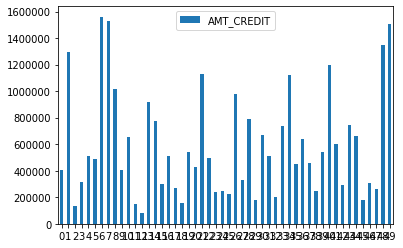

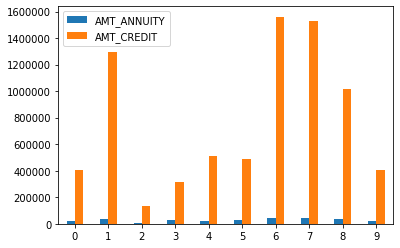

In [41]:
#對 'AMT_ANNUITY', 'AMT_CREDIT' 繪直方圖
app_train[:50].plot.bar( y='AMT_ANNUITY', rot=0) #只繪製前50筆資料
app_train[:50].plot.bar( y='AMT_CREDIT', rot=0) #只繪製前50筆資料
app_train[:10].plot.bar( y={'AMT_ANNUITY', 'AMT_CREDIT'}, rot=0) #將兩張不同的長條圖繪製再一起

(AMT_ANNUITY) mean=27108.5739, variance=210068421.3597
(AMT_CREDIT) mean=599025.9997, variance=161998825566.7270


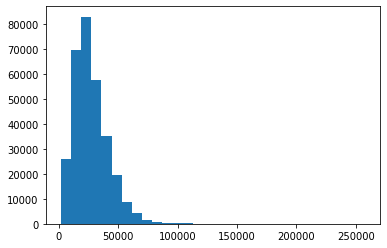

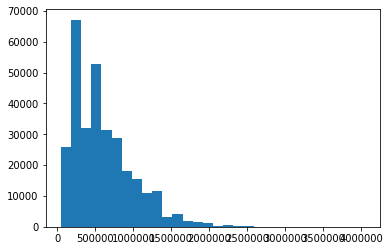

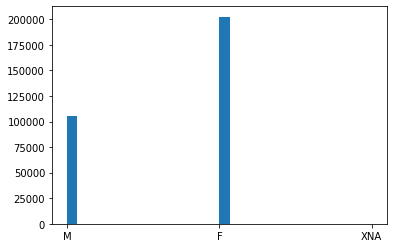

In [55]:
#對 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'CODE_GENDER' 繪製 Histogram
print('(AMT_ANNUITY) mean=%.4f, variance=%.4f'%(app_train['AMT_ANNUITY'].mean(), app_train['AMT_ANNUITY'].var()))  
print('(AMT_CREDIT) mean=%.4f, variance=%.4f'%(app_train['AMT_CREDIT'].mean(), app_train['AMT_CREDIT'].var()))  
plt.figure()
app_train['AMT_ANNUITY'].hist(bins=30, grid=False)
plt.figure()
app_train['AMT_CREDIT'].hist(bins=30, grid=False)
plt.figure()
app_train['CODE_GENDER'].hist(bins=30, grid=False)

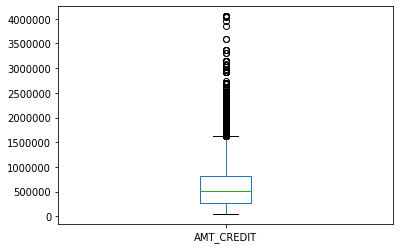

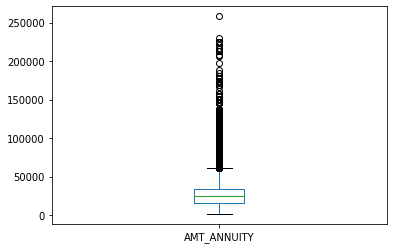

In [48]:
#畫 boxplot
plt.figure()
app_train.boxplot(column = ['AMT_CREDIT'], grid=False)
plt.figure()
app_train.boxplot(column = ['AMT_ANNUITY'], grid=False)

<Figure size 432x288 with 0 Axes>

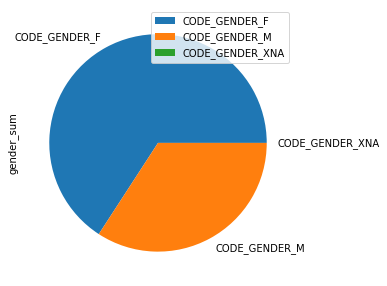

In [77]:
#畫圖性別餅圖
df_gender = app_train['CODE_GENDER']
sub_train = pd.DataFrame(df_gender)
sub_train_one_hot = pd.get_dummies(sub_train)
sub_train_one_hot.head(10)
sub_train_one_hot_sum = sub_train_one_hot.sum()
df_gender_sum = pd.DataFrame(sub_train_one_hot_sum, columns=['gender_sum'])

plt.figure()
plot = df_gender_sum.plot.pie(y='gender_sum', figsize=(5, 5))